In [31]:
import pandas as pd # pandas for preparing the data
from sklearn.datasets import load_breast_cancer # data from sklearn free datasets
# --- Jupyter gruvbox theme
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='notebook', ticks=True, grid=False)
# ---
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'],
columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions', X.shape) # There are 569 rows and 30 columns

data dimensions (569, 30)


In [20]:
from sklearn.ensemble import RandomForestClassifier # Random forest algorithm
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
rf = RandomForestClassifier()
rf.fit(X_train, y_train) # Create the model

RandomForestClassifier()

In [21]:
first_row = X_test[0]
print("Prediction: ", rf.predict([first_row])) # An example of model prediction
print("True value: ", y_test[0])

Prediction:  [1]
True value:  1


In [22]:
print("Accuracy of random forest: ", rf.score(X_test, y_test))

Accuracy of random forest:  0.9790209790209791


In [26]:
rf = RandomForestClassifier(n_estimators=15)
rf.fit(X_train, y_train)
print("Accuracy of random forest with 15 trees: ",rf.score(X_test, y_test))

Accuracy of random forest with 15 trees:  0.958041958041958


In [29]:
# Finding the best amount of trees
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_) # Best amount is 100

best params: {'n_estimators': 100}


In [28]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("Accuracy of random forest with 100 trees: ",rf.score(X_test, y_test))

Accuracy of random forest with 100 trees:  0.965034965034965


In [32]:
# Visualising accuracy for different amount of trees
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)

scores = gs.cv_results_['mean_test_score']

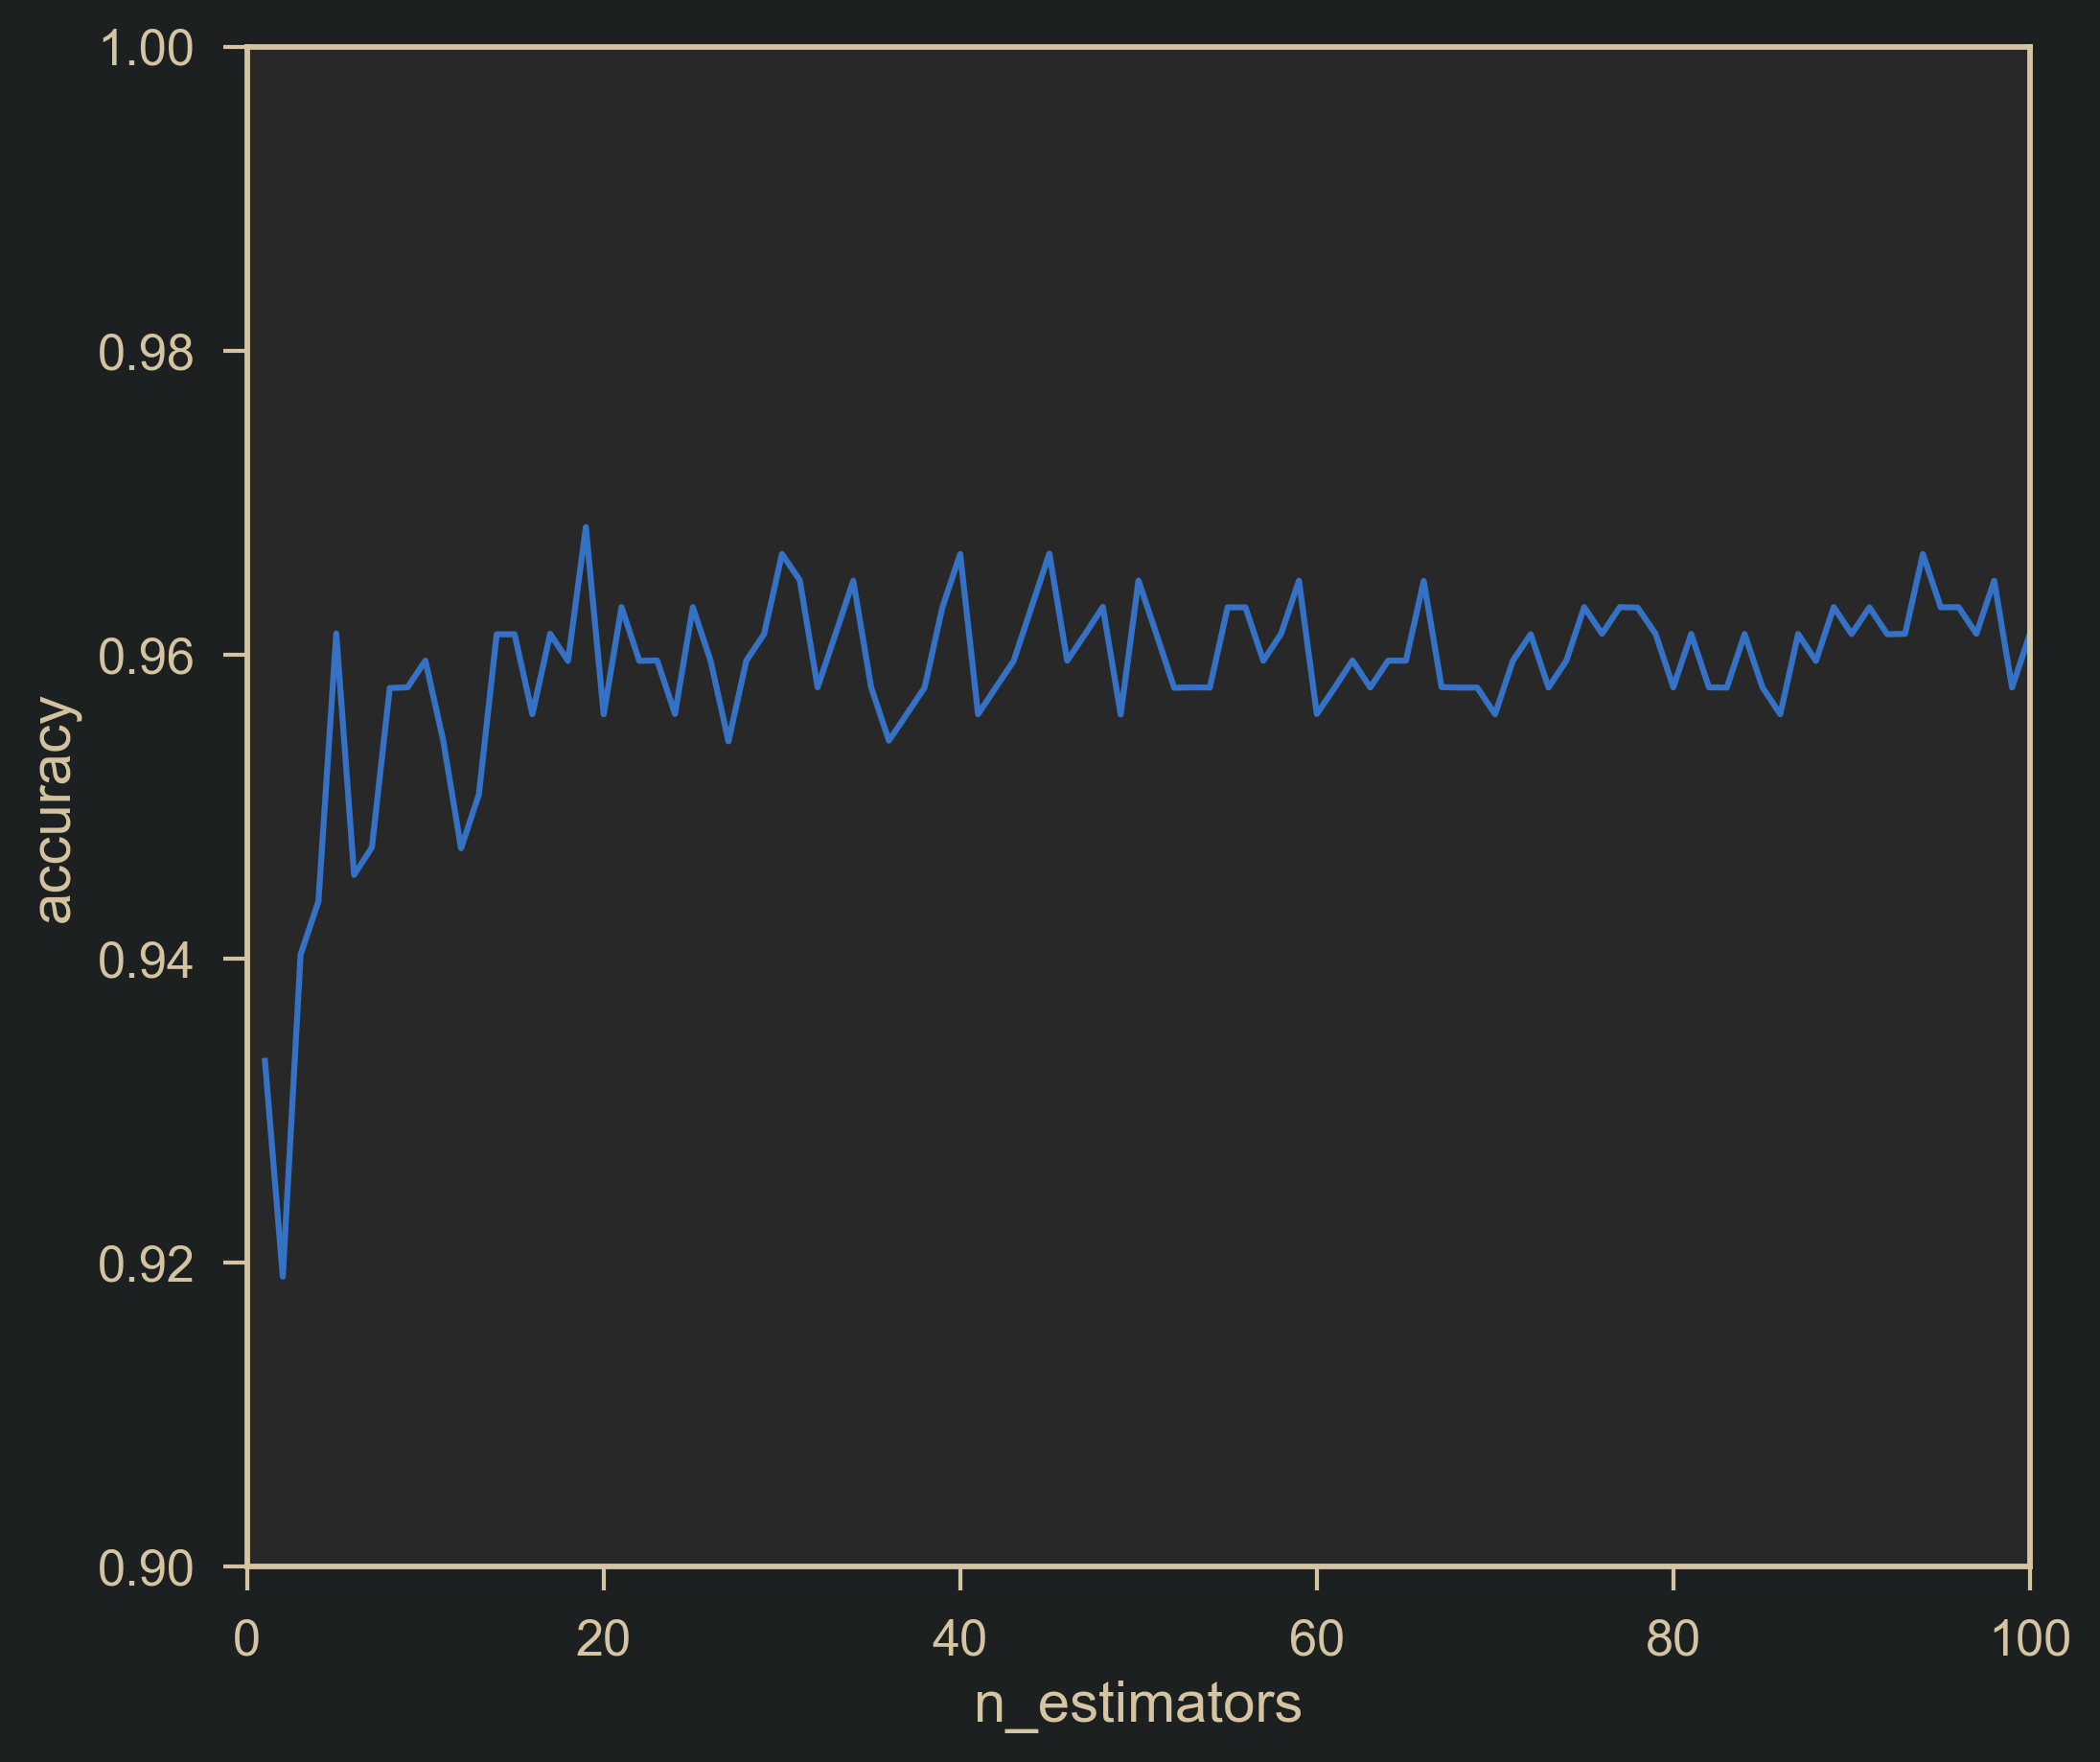

In [33]:
import matplotlib.pyplot as plt
scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show() # Optimal value for trees is about 15, with more trees the algorithm will be too complex

In [38]:
# Which features are important?
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train) 
ft_imp = pd.Series(rf.feature_importances_,
                   index=cancer_data.feature_names).sort_values(ascending = False)
ft_imp.head(10) 

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64

In [39]:
# Select most important features
worst_cols = [col for col in df.columns if 'worst' in col]
print(worst_cols)

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [41]:
X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.958041958041958